## **1-Import libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **2-Load Helper Function**

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-04-18 09:01:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-04-18 09:01:42 (72.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## **3-Import Functions Using Helper Functions**

In [3]:
# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## **4-Install and Import Split Folders**

In [4]:
pip install split-folders

In [5]:
import splitfolders

## **5-Mount Data From Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **6-Load Data from Google Drive**

In [7]:
import zipfile

# unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Deep_Learning_Datasets_For_Practice_Purposes/eye_disease_dataset.zip")
zip_ref.extractall()
zip_ref.close()

## **7-Get Class Names Programmatically**

In [8]:
# get the class names prgrammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Eye_diseases")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names)

['Bulging_Eyes' 'Cataracts' 'Crossed_Eyes' 'Glaucoma' 'Uveitis']


## **8-Visualize Our Images**

In [9]:
# let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # this line means randomly sample one item form the target folder
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show thw shape of the image

  return img 

## **9-Split The Folders into Train , Validation and Test Datasets**

In [10]:
splitfolders.ratio("/content/Eye_diseases", output="eye_cancer_dataset_model",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 383 files [00:00, 5673.40 files/s]


## **10-Set Train, Test and Validation Paths**

In [11]:
train_dir = "/content/eye_cancer_dataset_model/train/"
test_dir = '/content/eye_cancer_dataset_model/test/'
val_dir = '/content/eye_cancer_dataset_model/val/'

## **11-Checking Number of Images**

In [12]:
# How many images/classes are there?
walk_through_dir("/content/Eye_diseases")

There are 5 directories and 0 images in '/content/Eye_diseases'.
There are 0 directories and 50 images in '/content/Eye_diseases/Uveitis'.
There are 0 directories and 30 images in '/content/Eye_diseases/Bulging_Eyes'.
There are 0 directories and 174 images in '/content/Eye_diseases/Crossed_Eyes'.
There are 0 directories and 82 images in '/content/Eye_diseases/Glaucoma'.
There are 0 directories and 47 images in '/content/Eye_diseases/Cataracts'.


## **12-Set Data Inputs**

In [13]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 shuffle=False) # don't shuffle test data for prediction analysis

Found 305 files belonging to 5 classes.
Found 41 files belonging to 5 classes.


## **13-Create Checkpoint Callback**

In [14]:
# Create a checkpoint callback
checkpoint_path = "eye_cancer_classification_model"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

## **14-Make Data Augmentation**

In [15]:
# Create a data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
   preprocessing.RandomZoom(0.2),
  # preprocessing.Rescaling(1/255.)  # rescale inputs of images between 1 & 0, required for models like ResNet50                            
], name= "data_augmentation")



## **15-Setup Base Model (Feature Extraction)**

In [16]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model=tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [17]:
# Get a summary of model we've been created
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainable

## **16-Import Metrics**

In [18]:
from tensorflow.keras import metrics

In [19]:
METRICS = [
  metrics.TruePositives(name="tp"),
  metrics.FalsePositives(name="fp"),
  metrics.TrueNegatives(name="tn"),
  metrics.FalseNegatives(name="fn"),
  metrics.CategoricalAccuracy(name="accuracy"),
  metrics.Precision(name="precision"),
  metrics.Recall(name="recall"),
  metrics.AUC(name="auc")
]

## **17-Compile and Fit The Model**

In [20]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=METRICS)

# Fit
history_for_feature_extraction = model.fit(train_data,
                                           epochs=5, 
                                           validation_data=test_data,
                                           validation_steps=len(test_data))
                                           

Epoch 1/5
10/10 [==============================] - 44s 1s/step - loss: 1.5112 - tp: 21.0000 - fp: 20.0000 - tn: 1200.0000 - fn: 284.0000 - accuracy: 0.3869 - precision: 0.5122 - recall: 0.0689 - auc: 0.6669 - val_loss: 1.3873 - val_tp: 5.0000 - val_fp: 2.0000 - val_tn: 162.0000 - val_fn: 36.0000 - val_accuracy: 0.3902 - val_precision: 0.7143 - val_recall: 0.1220 - val_auc: 0.7360
Epoch 2/5
10/10 [==============================] - 6s 607ms/step - loss: 1.1633 - tp: 80.0000 - fp: 31.0000 - tn: 1189.0000 - fn: 225.0000 - accuracy: 0.5410 - precision: 0.7207 - recall: 0.2623 - auc: 0.8313 - val_loss: 1.2096 - val_tp: 14.0000 - val_fp: 4.0000 - val_tn: 160.0000 - val_fn: 27.0000 - val_accuracy: 0.5122 - val_precision: 0.7778 - val_recall: 0.3415 - val_auc: 0.8061
Epoch 3/5
10/10 [==============================] - 6s 536ms/step - loss: 1.0453 - tp: 126.0000 - fp: 43.0000 - tn: 1177.0000 - fn: 179.0000 - accuracy: 0.6164 - precision: 0.7456 - recall: 0.4131 - auc: 0.8651 - val_loss: 1.1145 - 

## **18-Evaluate The Model**

In [21]:
# Evaluate on the whole test dataset  ##its a feature extraction instead of fine tune
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

2/2 [==============================] - 0s 80ms/step - loss: 1.0110 - tp: 17.0000 - fp: 3.0000 - tn: 161.0000 - fn: 24.0000 - accuracy: 0.5610 - precision: 0.8500 - recall: 0.4146 - auc: 0.8714


[1.011032223701477,
 17.0,
 3.0,
 161.0,
 24.0,
 0.5609756112098694,
 0.8500000238418579,
 0.4146341383457184,
 0.8713563680648804]

## **19-Plot The Graph**

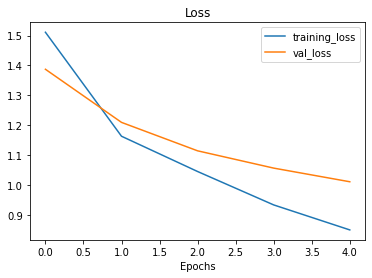

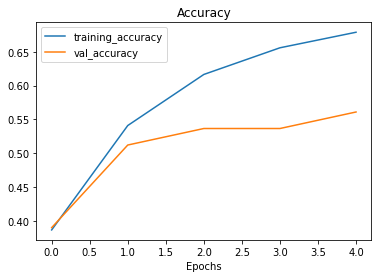

In [22]:
plot_loss_curves(history_for_feature_extraction)

## **20-Unfreeze Some Layers**

In [23]:
base_model.trainable=True

for layer in base_model.layers[:-5]:
  layer.trainable=False

## **21-Recompile and Fit The Model**

In [24]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate lower by 10x
              metrics=METRICS)

In [25]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pooling_layer True
output_layer True


In [26]:
# Check which layers in our model is trainable
for layer_number, layer in enumerate(model.layers[1].layers):
  print(layer_number, layer.name, layer.trainable )

0 random_flip True
1 random_rotation True
2 random_height True
3 random_width True
4 random_zoom True


In [27]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_for_fine_tune = model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=len(test_data),
                                                     initial_epoch=history_for_feature_extraction.epoch[-1])

Epoch 5/10
10/10 [==============================] - 19s 895ms/step - loss: 0.8340 - tp: 186.0000 - fp: 42.0000 - tn: 1342.0000 - fn: 160.0000 - accuracy: 0.6763 - precision: 0.8158 - recall: 0.5376 - auc: 0.9153 - val_loss: 0.9984 - val_tp: 19.0000 - val_fp: 4.0000 - val_tn: 160.0000 - val_fn: 22.0000 - val_accuracy: 0.5610 - val_precision: 0.8261 - val_recall: 0.4634 - val_auc: 0.8724
Epoch 6/10
10/10 [==============================] - 6s 641ms/step - loss: 0.7600 - tp: 174.0000 - fp: 29.0000 - tn: 1191.0000 - fn: 131.0000 - accuracy: 0.7311 - precision: 0.8571 - recall: 0.5705 - auc: 0.9357 - val_loss: 0.9796 - val_tp: 20.0000 - val_fp: 8.0000 - val_tn: 156.0000 - val_fn: 21.0000 - val_accuracy: 0.5366 - val_precision: 0.7143 - val_recall: 0.4878 - val_auc: 0.8783
Epoch 7/10
10/10 [==============================] - 6s 614ms/step - loss: 0.6848 - tp: 190.0000 - fp: 36.0000 - tn: 1184.0000 - fn: 115.0000 - accuracy: 0.7541 - precision: 0.8407 - recall: 0.6230 - auc: 0.9499 - val_loss: 

## **22-Re_Evaluate The Model**

In [28]:
# Evaluate on the whole test dataset
fine_tune_results =model.evaluate(test_data)
fine_tune_results

2/2 [==============================] - 0s 59ms/step - loss: 0.9147 - tp: 20.0000 - fp: 8.0000 - tn: 156.0000 - fn: 21.0000 - accuracy: 0.6341 - precision: 0.7143 - recall: 0.4878 - auc: 0.8922


[0.9146859049797058,
 20.0,
 8.0,
 156.0,
 21.0,
 0.6341463327407837,
 0.7142857313156128,
 0.4878048896789551,
 0.8921772837638855]

## **23-Compare Histories**

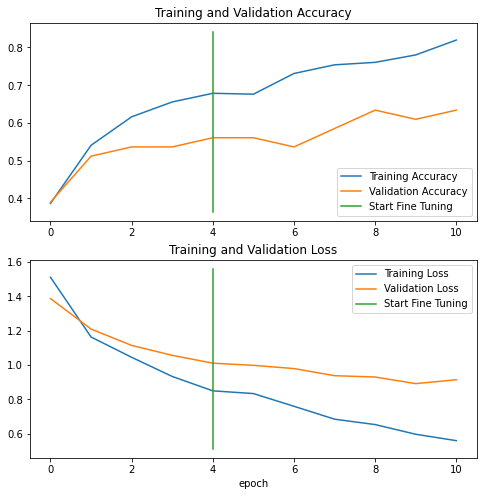

In [29]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_for_feature_extraction,
                 new_history=history_for_fine_tune,
                 initial_epochs=5)

## **24-Save The Model**

In [87]:
# Save our fine-tuning model
model.save("drive/MyDrive/Deep_Learning_Models_h5/eye_cancer_detection_model_updated.h5")

## **25-Load The Model**

In [88]:
# Load and evaluate saved model
loaded_model =tf.keras.models.load_model("drive/MyDrive/Deep_Learning_Models_h5/eye_cancer_detection_model_updated.h5")

In [89]:
# Evaluate loaded model and compare performance to pre-saved model
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

2/2 [==============================] - 5s 84ms/step - loss: 0.9147 - tp: 20.0000 - fp: 8.0000 - tn: 156.0000 - fn: 21.0000 - accuracy: 0.6341 - precision: 0.7143 - recall: 0.4878 - auc: 0.8922


[0.9146859049797058,
 20.0,
 8.0,
 156.0,
 21.0,
 0.6341463327407837,
 0.7142857313156128,
 0.4878048896789551,
 0.8921772837638855]

In [33]:
# The results from the saved model (Above) should be very similar to the results below
fine_tune_results

[0.9146859049797058,
 20.0,
 8.0,
 156.0,
 21.0,
 0.6341463327407837,
 0.7142857313156128,
 0.4878048896789551,
 0.8921772837638855]

## **26-Make Prediction Probabilites**

In [34]:
# Make predictions with model
preds_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it left

2/2 [==============================] - 2s 142ms/step


In [35]:
len(test_data)

2

In [36]:
# How many predictions are there?
len(preds_probs)

41

In [37]:
# What's the shape of our predictions?
preds_probs.shape

(41, 5)

In [38]:
# Let's see whats the first 10 predictions looks like
preds_probs[:10]

array([[2.07114145e-01, 5.28585119e-03, 6.82847559e-01, 2.69671939e-02,
        7.77852461e-02],
       [8.53309631e-02, 4.21746261e-02, 4.01594847e-01, 1.15179546e-01,
        3.55720013e-01],
       [2.83004940e-01, 5.14193298e-03, 6.72096908e-01, 3.35429348e-02,
        6.21321285e-03],
       [1.48691665e-02, 2.83961564e-01, 1.02039156e-02, 4.15768236e-01,
        2.75197148e-01],
       [2.55046273e-03, 2.13222340e-01, 2.81268358e-03, 4.05182332e-01,
        3.76232147e-01],
       [4.22520709e-04, 1.96176209e-02, 2.71265153e-02, 4.93755162e-01,
        4.59078223e-01],
       [1.32655412e-01, 1.23297036e-01, 5.12942731e-01, 1.61382750e-01,
        6.97220415e-02],
       [1.09574117e-03, 1.82432644e-02, 1.08417794e-01, 4.97921258e-01,
        3.74321997e-01],
       [2.92800181e-03, 3.68486196e-01, 1.64137408e-02, 3.04776400e-01,
        3.07395697e-01],
       [3.86045463e-02, 5.25668077e-03, 9.12067950e-01, 2.07140725e-02,
        2.33567655e-02]], dtype=float32)

In [39]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([0.20711415, 0.00528585, 0.68284756, 0.02696719, 0.07778525],
       dtype=float32), 5, 0.9999999958090484)

In [40]:
# We get one prediction probability per class(in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilites for sample 0: {len(preds_probs[0])}")
print(f"What prediction probabilites sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")


Number of prediction probabilites for sample 0: 5
What prediction probabilites sample 0 looks like:
 [0.20711415 0.00528585 0.68284756 0.02696719 0.07778525]
The class with highest predicted probability by the model for sample 0: 2


In [41]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([2, 2, 2, 3, 3, 3, 2, 3, 1, 2])

In [42]:
# How many pred classes we have?
len(pred_classes)

41

In [43]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 1, 1, 1, 1, 1, 1, 2]

In [44]:
# How many y_labels are there?
len(y_labels)

41

In [45]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [46]:
len(test_data)

2

## **27-Make Confusion Matrix**

In [47]:
from helper_functions import make_confusion_matrix

In [48]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['Bulging_Eyes', 'Cataracts', 'Crossed_Eyes', 'Glaucoma', 'Uveitis']

In [49]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

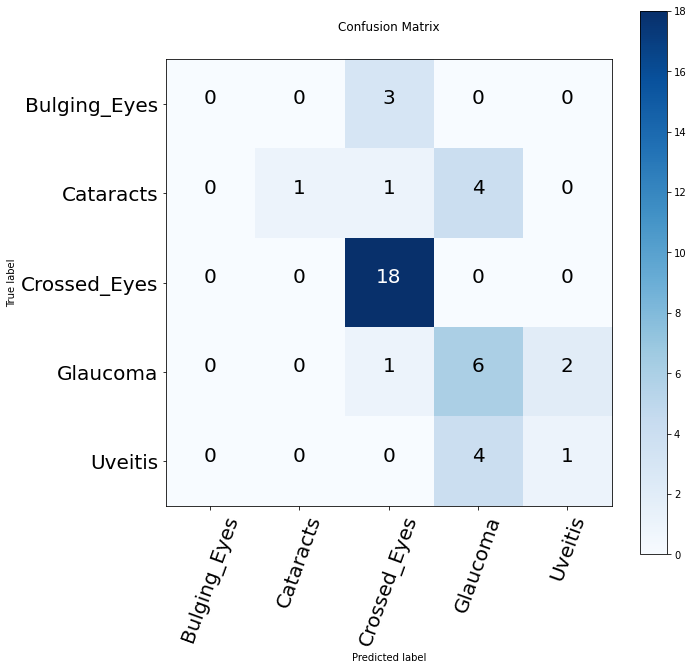

In [50]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      savefig=True)

## **28-Make Classification Report**

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.17      0.29         6
           2       0.78      1.00      0.88        18
           3       0.43      0.67      0.52         9
           4       0.33      0.20      0.25         5

    accuracy                           0.63        41
   macro avg       0.51      0.41      0.39        41
weighted avg       0.62      0.63      0.57        41



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 3},
 '1': {'f1-score': 0.2857142857142857,
  'precision': 1.0,
  'recall': 0.16666666666666666,
  'support': 6},
 '2': {'f1-score': 0.878048780487805,
  'precision': 0.782608695652174,
  'recall': 1.0,
  'support': 18},
 '3': {'f1-score': 0.5217391304347826,
  'precision': 0.42857142857142855,
  'recall': 0.6666666666666666,
  'support': 9},
 '4': {'f1-score': 0.25,
  'precision': 0.3333333333333333,
  'recall': 0.2,
  'support': 5},
 'accuracy': 0.6341463414634146,
 'macro avg': {'f1-score': 0.3871004393273747,
  'precision': 0.5089026915113871,
  'recall': 0.40666666666666673,
  'support': 41},
 'weighted avg': {'f1-score': 0.572312583828762,
  'precision': 0.6246528303792356,
  'recall': 0.6341463414634146,
  'support': 41}}

In [53]:
class_names[1]

'Cataracts'

In [54]:
classification_report_dict["1"]["f1-score"]

0.2857142857142857

In [55]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'Bulging_Eyes': 0.0,
 'Cataracts': 0.2857142857142857,
 'Crossed_Eyes': 0.878048780487805,
 'Glaucoma': 0.5217391304347826,
 'Uveitis': 0.25}

In [56]:
# Turn f1 scores into Dataframe visualization
import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                

,class_names,f1-score
2,Crossed_Eyes,0.878049
3,Glaucoma,0.521739
1,Cataracts,0.285714
4,Uveitis,0.250000
0,Bulging_Eyes,0.000000


In [57]:
f1_scores[:2]

,class_names,f1-score
2,Crossed_Eyes,0.878049
3,Glaucoma,0.521739


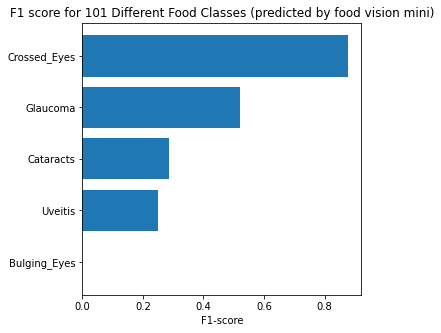

In [58]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score for 101 Different Food Classes (predicted by food vision mini)")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

## **29-Load and Prepare Images Function**

In [59]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


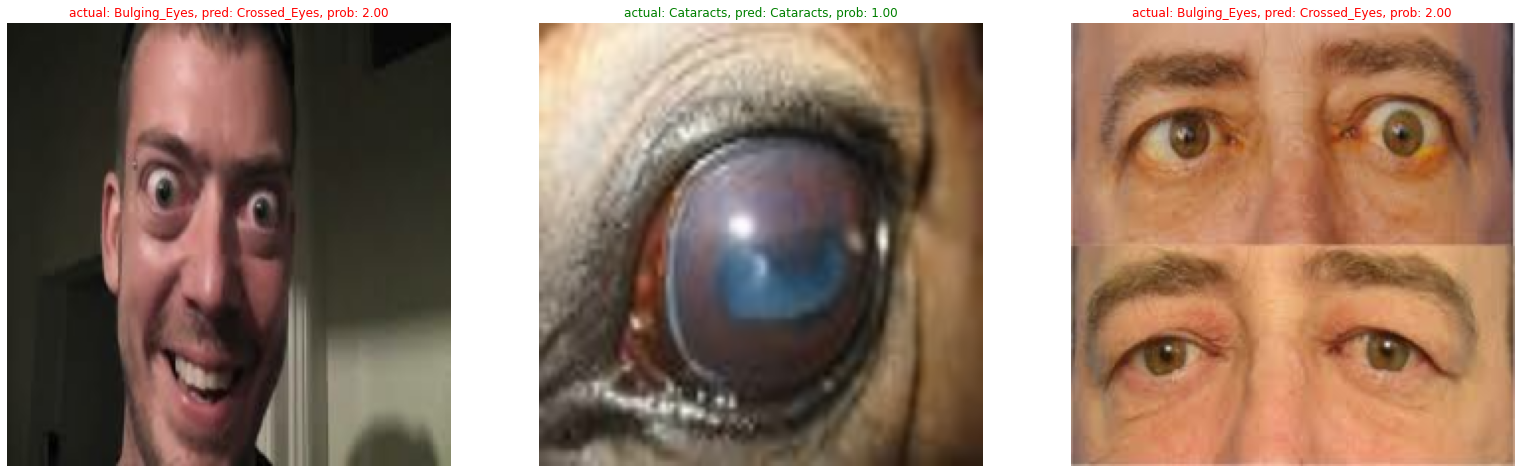

In [60]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(27,20))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(val_dir + "/" + class_name))
  filepath = val_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

In [85]:
custom_food_images=[ '/content/eye_cancer_dataset_model/test/Crossed_Eyes/images-110.jpeg' ,'/content/eye_cancer_dataset_model/train/Bulging_Eyes/image-12.jpeg', '/content/eye_cancer_dataset_model/test/Glaucoma/images-39.jpeg','/content/eye_cancer_dataset_model/test/Crossed_Eyes/images-110.jpeg', '/content/eye_cancer_dataset_model/test/Cataracts/images-30.jpeg', '/content/eye_cancer_dataset_model/test/Glaucoma/images-8.jpeg', '/content/eye_cancer_dataset_model/test/Uveitis/images-30.jpeg', '/content/eye_cancer_dataset_model/test/Crossed_Eyes/images-86.jpeg', '/content/eye_cancer_dataset_model/test/Cataracts/images-15.jpeg' , '/content/eye_cancer_dataset_model/test/Bulging_Eyes/images-14.jpeg', '/content/eye_cancer_dataset_model/test/Bulging_Eyes/images-12.jpeg' ,  '/content/eye_cancer_dataset_model/test/Cataracts/images-15.jpeg', '/content/eye_cancer_dataset_model/test/Bulging_Eyes/images-3.jpeg', '/content/eye_cancer_dataset_model/test/Bulging_Eyes/images-14.jpeg']

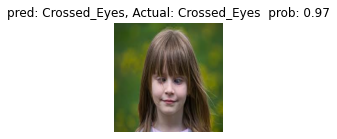

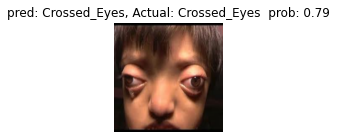

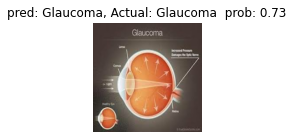

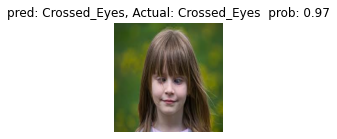

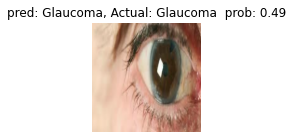

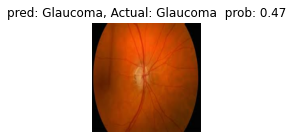

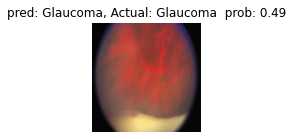

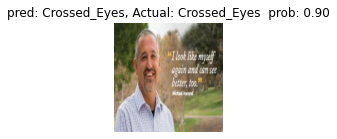

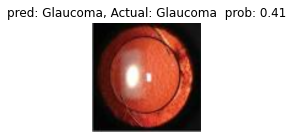

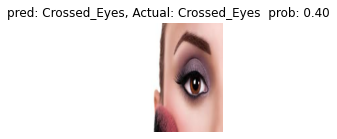

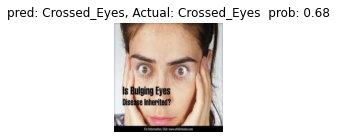

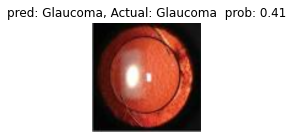

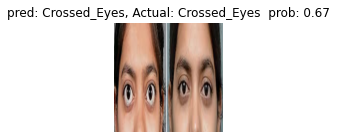

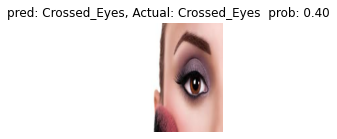

In [86]:
# Make prediction on and plot the custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # don't need to do scale for our EfficienNetV2B0 model
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on the image with shape [1, 224,224, 1] (same shape as model trained on)
  pred_class = class_names[pred_prob.argmax()] # get the index with heighest prediction probability
  # plot the appropriate information
  plt.figure(figsize=(2,2))
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, Actual: {pred_class}  prob: {pred_prob.max():.2f}")
  plt.axis(False)